# Лабораторная работа №2.1
## Опыт Франка-Герца

В работе:
- Методом электронного возбуждения измеряется энергия первого уровня атома гелия в динамическом и статическом режимах

## Теоретическая справка
Схема опыта изображена на рис. 1:
![Принципиальная схема опыта Франка и Герца](./images/1.png)

**Разреженный одноатомный газ** (в нашем случае - гелий) заполняет трёхэлектродную лампу. Электроны, испускаемые разогретым катодом, ускоряются в постоянном электрическом поле, созданным между катодом и сетчатым анодом лампы. Передвигаясь от катода к аноду, **электроны сталкиваются** с атомами гелия. Если **энергия электрона**, налетающего на атом, **недостаточна** для того, чтобы перевести его в возбуждённое состояние (или ионизировать), то **возможны только упругие соударения**, при которых электроны почти не теряют энергии, так как их масса в тысячи раз меньше массы атомов.

По мере увеличения разности потенциалов между анодом и катодом **энергия электронов увеличивается** и, в конце концов, оказывается достаточной для возбуждения атомов. При таких - **непругих** - столкновениях кинетическая **энергия налетающего электрона** передаётся одному из атомных электронов, вызывая его переход на свободный энергетический уровень **(возбуждение)** или совсем отрывая его от атома **(ионизация)**.

Третьим электродом лампы является **коллектор**. Между ним и анодом поддерживается **небольшое задерживающее напряжение** (потенциал коллетора меньше потенциала анода). Ток коллектора, пропорциональный числу попадающих на него за секунду электронов, измеряется микроамперметром.

При увеличении потенциала анода ток в лампе вначале растёт, подобно тому как это происходит в вакуумном диоде (рис. 2). Однако, когда **энергия** электронов становится достаточной **для возбуждения атомов**, ток коллекторая резко уменьшается. Это происходит потому, что **при неупругих соударениях** с атомами электроны **почти полностью теряют свою энергию** и не могут преодолеть задерживающего потенциала (около 1 В) между анодом и коллектором. **При дальнейшем увеличении потенциала** анода ток коллектора вновь возрастает: электроны, испытавшие неупругие соударения, при дальнейшем движении к аноду **успевают набрать энергию**, достаточную для преодоления задерживающего потенциала.
![Зависимость тока коллектора от напряжения на аноде](./images/2.png)

**Следующее замедление роста** тока происходит в момент, когда часть электронов неупруго **сталкивается с атомами два раза**: первый раз посередине пути, второй - у анода, и т.д. Таким образом, на кривой зависимости тока коллектора от напряжения анода имеется ряд максимумов и минимумов, отстоящих друг от друга на равные расстояния $\Delta V$; эти расстояния равны энергии первого возбуждённого состояния (рис. 2).

## Экспериментальная установка
Схема экспериментальной установки изображена на рис.3
![Схема экспериментальной установки](./images/3.png)

*$V_1, V_2, V_3$ - вольтметры; $П_1, П_2, П_3$ - потенциометры; А - амперметр, В - выпрямитель, С - источник питания, R - нагрузочный резистор, Т - трансформатор; $К_1, К_2, К_3$ - ключи замыкания; 4,5 В - источник задерживающего напряжения*

Схема БИП (блока источника питания) изображена на рис. 4:
![Блок-схема экспериментальной установки](./images/3.png)

## Ход работы
1. Подготавливаем приборы к работе.
2. Получаем вольт-амперную характеристику $I_k = f(V_a)$ на экране осциллографа
3. Получаем вольт-амперную характеристику $I_k = f(V_a)$ в статическом режиме измерений

## Динамический режим
![1](./images/1.jpg)

In [2]:
import pandas as pd # Для хранения данных
import matplotlib.pyplot as plt # Для построения графиков
import numpy as np # Для квадратного корня и не только
from scipy.optimize import curve_fit # Для интерполяции
from scipy.signal import argrelextrema

По осциллографу определим расстояние между минимумами и максимумами:

In [12]:
dyn_dV_4_max = np.array([2.8, 2.8, 3.5]).mean() * 5
dyn_dV_6_max = np.array([3, 2.8, 4, 3.6]).mean() * 5
dyn_dV_4_min = np.array([3, 3.8]).mean() * 5
dyn_dV_6_min = np.array([2, 3, 3, 4]).mean() * 5
print(f"4 V:{abs(dyn_dV_4_max):3.3} eV")
print(f"6 V:{dyn_dV_6_max} eV")

4 V:15.2 eV
6 V:16.75 eV


Загрузим данные:

In [4]:
data4 = pd.read_csv("data.csv", sep=",", header=0)
data4.columns = ['U, V', 'I, mcA']
data4['I, mcA'] = data4['I, mcA'] * 5

data8 = pd.read_csv("data8.csv", sep=",", header=0)
data8.columns = ['U, V', 'I, mcA']
data8['I, mcA'] = data8['I, mcA'] * 5

Выведем верхушку загруженных данных:

In [5]:
print("4 Вольта: \n", data4.head(), "\n\n 8 Вольт: \n", data8.head())

4 Вольта: 
    U, V  I, mcA
0  0.06      10
1  0.11      15
2  1.80      35
3  1.95      35
4  2.20      40 

 8 Вольт: 
    U, V  I, mcA
0  0.06       0
1  5.15      30
2  6.66      50
3  8.29      75
4  9.37     100


Построим график зависимости $I_k = f(V_a)$ для $V_2=4 \; B$:

In [6]:
def draw(x, y, caption):
    plt.figure(figsize=(14, 10))
    plt.xlabel(r'$V_a$, V', fontsize=20)
    plt.ylabel(r'$I_k$, mcA', fontsize=20)
    plt.title(caption, fontsize=20)
    
    plt.plot(x, y, 'bo', label='initial points')
    plt.legend(fontsize=20, loc='best')
    plt.show()

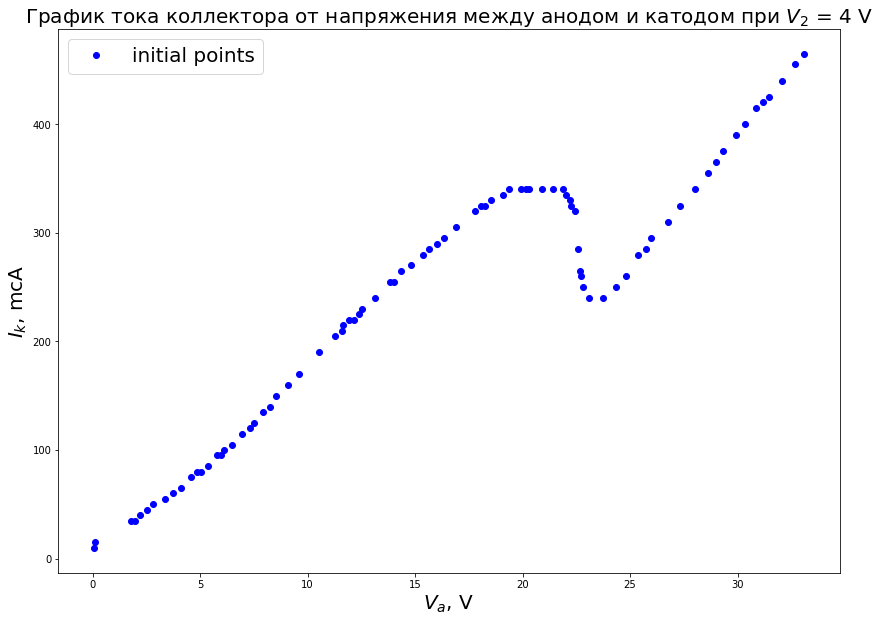

In [7]:
draw(data4['U, V'], data4['I, mcA'], r'График тока коллектора от напряжения между анодом и катодом при $V_2$ = 4 V')

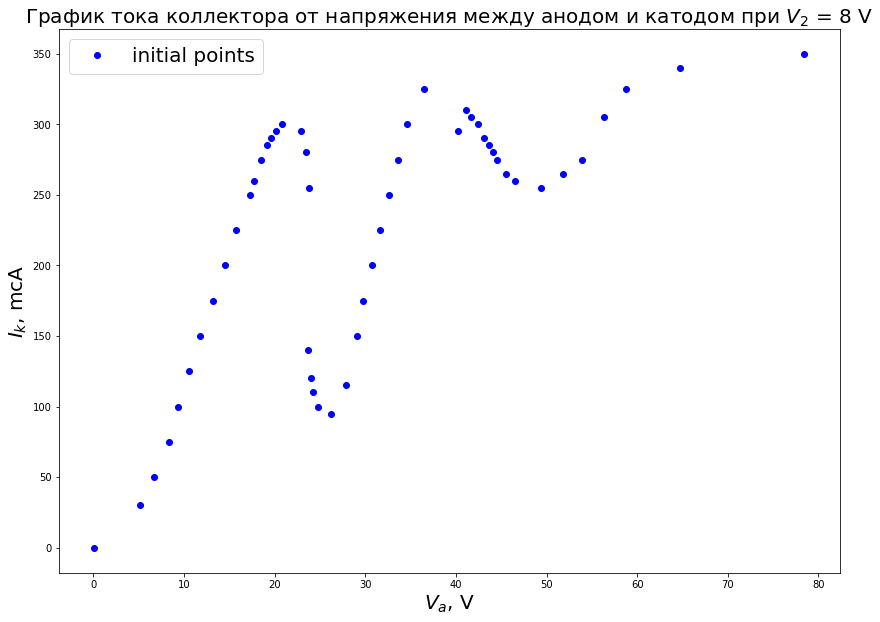

In [8]:
draw(data8['U, V'], data8['I, mcA'], r'График тока коллектора от напряжения между анодом и катодом при $V_2$ = 8 V')

In [9]:
m1 = argrelextrema(np.array(data4['I, mcA']), np.greater)
m2 = argrelextrema(np.array(data8['I, mcA']), np.greater)
np_data_v_4 = np.array(data4['U, V'])
np_data_v_8 = np.array(data8['U, V'])

In [10]:
max_v_4 = np_data_v_4[m1]
max_v_8 = np_data_v_8[m2]

In [11]:
delta_v_8 = max_v_8[2]-max_v_8[0]
print(f"Энергия возбуждения первого уровня атома Гелия:{delta_v_8:3.4}")

Энергия возбуждения первого уровня атома Гелия:15.67


# Вывод:
1. С помощью опыта Франка-Герца измерили энергию первого уровня атома гелия. 
2. При измерении в динамическом режиме получили при 4 В -- 15.2 эВ, при 6 В -- 16.75 эВ, что неплохо согласуется со справочными данными.
3. При измерении в статическом режиме 15.67 эВ, что также неплохо согласуется со справочными данными